CREDITCARD FRAUDLENT PREDICTION USING MACHINNE LEARNING

In [ ]:
# imporing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
#Loading the Dataset

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284806.0,9.481359e+04,47488.004530,0.000000,54201.250000,84691.500000,139320.000000,172788.000000
V1,284806.0,1.872900e-06,1.958699,-56.407510,-0.920374,0.018109,1.315645,2.454930
V2,284806.0,6.661837e-07,1.651311,-72.715728,-0.598552,0.065496,0.803726,22.057729
V3,284806.0,-2.469532e-06,1.516257,-48.325589,-0.890368,0.179846,1.027198,9.382558
V4,284806.0,1.777601e-06,1.415871,-5.683171,-0.848642,-0.019845,0.743348,16.875344
V5,284806.0,4.405008e-08,1.380249,-113.743307,-0.691599,-0.054336,0.611927,34.801666
V6,284806.0,2.280910e-06,1.332273,-26.160506,-0.768296,-0.274186,0.398567,73.301626
V7,284806.0,-5.537125e-06,1.237092,-43.557242,-0.554080,0.040097,0.570426,120.589494
V8,284806.0,1.455905e-06,1.194355,-73.216718,-0.208628,0.022358,0.327346,20.007208
V9,284806.0,-1.707056e-06,1.098634,-13.434066,-0.643098,-0.051429,0.597140,15.594995


In [ ]:
df["Class"].value_counts()

,count
Class,
0,284314
1,492


HANDING THE IMBALACED DATA IN DATASET CLASS COLUMN

In [ ]:
# we are using oversampling techique to oversample the class 1 values

In [ ]:
c0,c1 = df.Class.value_counts()

In [ ]:
c0

284314

In [ ]:
c1

492

In [ ]:
df_class_0 = df[df["Class"]==0]
df_class_1 = df[df["Class"]==1]

In [ ]:
df_class_0.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df_class_0["Class"].value_counts()

,count
Class,
0,284314


In [ ]:
df_class_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [ ]:
df_class_1["Class"].value_counts()

,count
Class,
1,492


In [ ]:
df_class_over = df_class_1.sample(c0,replace=True)

In [ ]:
df_class_over["Class"].value_counts()

,count
Class,
1,284314


In [ ]:
#concatenete the df_class_0 and df_class_over

In [ ]:
new_df = pd.concat([df_class_0,df_class_over],axis=0)

In [ ]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
new_df.shape

(568628, 31)

In [ ]:
new_df["Class"].value_counts()

,count
Class,
0,284314
1,284314


In [ ]:
x = new_df.drop("Class",axis=1)
y = new_df["Class"]

In [ ]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8617,11635.0,0.919137,4.199633,-7.535607,7.426940,1.118215,-2.886722,-1.341036,0.363933,-2.203224,...,0.535435,0.316094,0.055179,0.210692,-0.417918,-0.911188,0.466524,0.627393,0.157851,1.00
154670,102489.0,-2.296987,4.064043,-5.957706,4.680008,-2.080938,-1.463272,-4.490847,1.029246,-1.593249,...,1.264954,1.089084,0.975398,-0.625530,-0.535181,0.247435,0.160400,0.969582,0.335041,104.00
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.634184,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33
45203,42247.0,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,...,-0.162797,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1.00


In [ ]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
8617,1
154670,1
142557,1
45203,1


In [ ]:
#scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x = scaler.fit_transform(x)

In [ ]:
x

array([[-1.82443665,  0.18498608, -0.50588191, ...,  0.04827017,
        -0.13008468,  0.17311702],
       [-1.82443665,  0.64821366, -0.41463813, ..., -0.09189226,
        -0.05132072, -0.40364492],
       [-1.82441587,  0.18524987, -0.8470735 , ..., -0.13748803,
        -0.2152805 ,  1.07219517],
       ...,
       [-0.06288111,  0.17208651, -0.70233708, ..., -0.20140147,
        -0.00537517,  0.97668971],
       [-0.94672331, -0.02636288,  0.07855448, ...,  0.3653525 ,
        -0.97684984, -0.41027888],
       [ 1.51775914,  0.31488287,  0.86039365, ...,  0.56982859,
         0.33910117, -0.41118172]])

In [ ]:
# splitting the data into training and testing data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(454902, 30)

In [ ]:
x_test.shape

(113726, 30)

In [ ]:
y_train.shape

(454902,)

In [ ]:
y_test.shape

(113726,)

In [ ]:
# model initialization

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
l_model = LogisticRegression(max_iter=1000)

In [ ]:
l_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
pred = l_model.predict(x_test)

In [ ]:
l_model.score(x_train,y_train)

0.950519012886292

In [ ]:
l_model.score(x_test,y_test)

0.9510665986669715

In [ ]:
# using the classification report

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56794
           1       0.98      0.92      0.95     56932

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [ ]:
cm = confusion_matrix(y_test,pred)

In [ ]:
#impoting seaborn library

In [ ]:
import seaborn as sns

In [ ]:
# plotting the values heatmap

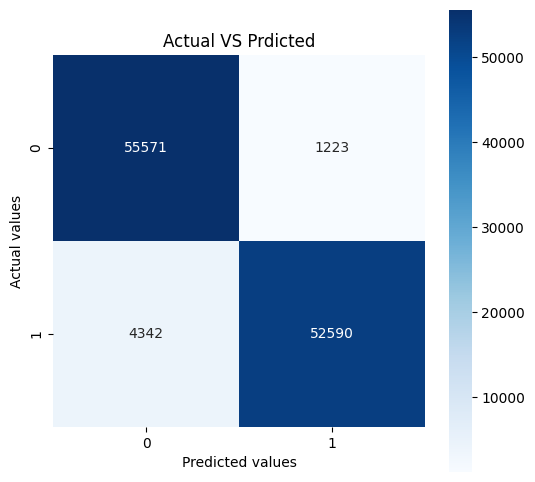

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,square=True,cmap="Blues",fmt=".0f")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Actual VS Prdicted")
plt.show()

BULDING THE MULTIPLE CLASSIFICATION MODELS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
mul_models = [KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),]

In [ ]:
for models in mul_models:
  models.fit(x_train,y_train)
  m_pred = models.predict(x_test)
  print(m_pred)

[1 1 0 ... 1 1 0]
[1 1 0 ... 1 1 0]
[1 1 0 ... 1 1 0]


In [ ]:
cm1 = confusion_matrix(y_test,m_pred)

In [ ]:
cm1

array([[56338,   456],
       [  340, 56592]])

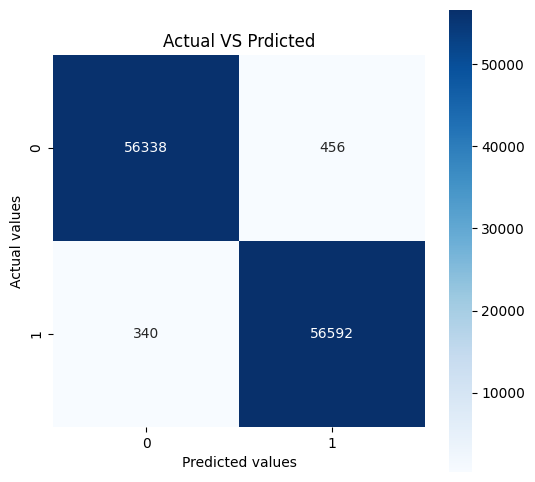

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,square=True,cmap="Blues",fmt=".0f")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Actual VS Prdicted")
plt.show()

In [ ]:
print(classification_report(y_test,m_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56794
           1       0.99      0.99      0.99     56932

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



END OF THE PROJECT